# **Khai Báo Thư Viện**

In [1]:
import sys,os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Kết Nối Drive Và Đọc Dữ Liệu**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
training_set = ('/content/drive/MyDrive/AI/CuoiKi/TrainCam')
val_set = ('/content/drive/MyDrive/AI/CuoiKi/Validation')

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=30, zoom_range = 0.15, width_shift_range=0.10, height_shift_range=0.10, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
training_set= train_datagen.flow_from_directory(training_set,target_size=(64, 64), batch_size=10, class_mode='binary')      
val_set = val_datagen.flow_from_directory(val_set,target_size=(64, 64),batch_size=10,class_mode='binary')

Found 1245 images belonging to 2 classes.
Found 523 images belonging to 2 classes.


# **Xây Dựng Model**

In [22]:
import tensorflow as tf
import keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy  
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2 
from keras.utils import np_utils

def classifier_model():
    
    # initializing the sequential model
    model = Sequential()

    # Tạo lớp đầu tiên của model
    model.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation = 'relu' , kernel_initializer='random_normal'))
    model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'random_normal'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.2))

    # tạo lớp thứ 2 của model
    model.add(Conv2D(64, (3,3), activation = 'relu', kernel_initializer = 'random_normal'))
    model.add(Conv2D(64, (3,3), activation = 'relu', kernel_initializer = 'random_normal'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.2))

    # tạo lớp thứ 3 của model
    model.add(Conv2D(64, (3,3), activation = 'relu', kernel_initializer = 'random_normal'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.2))

    # Flattening the model
    model.add(Flatten())

    # Thêm Dense layers
    model.add(Dense(256, activation='relu' , kernel_initializer='random_normal'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu' , kernel_initializer='random_normal'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    # Thêm output layer
    model.add(Dense(1, activation='sigmoid' , kernel_initializer='random_normal'))

    #Biên dịch chương trình
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model
model = classifier_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 conv2d_41 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 batch_normalization_32 (Bat  (None, 60, 60, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 dropout_48 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 conv2d_42 (Conv2D)          (None, 28, 28, 64)       

In [23]:
history = model.fit(training_set, steps_per_epoch=1245//20,epochs=100, verbose=1,validation_data = val_set,validation_steps=523//20)

Epoch 1/100
62/62 [==============================] - ETA: 0s - loss: 0.3560 - accuracy: 0.8645

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


62/62 [==============================] - 195s 3s/step - loss: 0.3560 - accuracy: 0.8645 - val_loss: 0.6553 - val_accuracy: 0.4769
Epoch 2/100
62/62 [==============================] - 85s 1s/step - loss: 0.2740 - accuracy: 0.9106 - val_loss: 0.6628 - val_accuracy: 0.5154
Epoch 3/100
62/62 [==============================] - 47s 767ms/step - loss: 0.2547 - accuracy: 0.9129 - val_loss: 1.0601 - val_accuracy: 0.4692
Epoch 4/100
62/62 [==============================] - 32s 515ms/step - loss: 0.2276 - accuracy: 0.9161 - val_loss: 0.5553 - val_accuracy: 0.5038
Epoch 5/100
62/62 [==============================] - 24s 391ms/step - loss: 0.2878 - accuracy: 0.8855 - val_loss: 0.7236 - val_accuracy: 0.4769
Epoch 6/100
62/62 [==============================] - 19s 311ms/step - loss: 0.2267 - accuracy: 0.9194 - val_loss: 0.3178 - val_accuracy: 0.9077
Epoch 7/100
62/62 [==============================] - 19s 298ms/step - loss: 0.2272 - accuracy: 0.9145 - val_loss: 0.2106 - val_accuracy: 0.9115
Epoch 8/1

In [24]:
model.save('/content/drive/MyDrive/AI/CuoiKi/SaveModel/Orange_test1.h5')

# **Vẽ Đồ Thị**

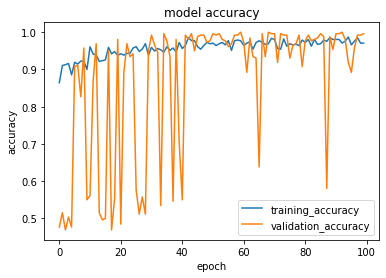

In [25]:
plt.plot(history.history['accuracy'][0:220])
plt.plot(history.history['val_accuracy'][0:220])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_accuracy', 'validation_accuracy'])
plt.show()

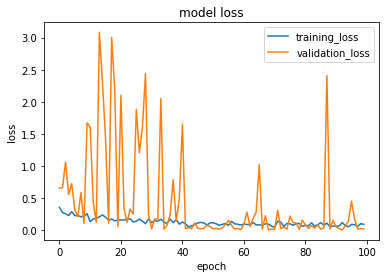

In [26]:
plt.plot(history.history['loss'][0:220])
plt.plot(history.history['val_loss'][0:220])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'])
plt.show()

# **Prediction Results**

In [27]:
fer_json = model.to_json()
with open ("/content/drive/MyDrive/AI/CuoiKi/SaveModel/fer.json","w") as json_file:
  json_file.write(fer_json)
model.save_weights("/content/drive/MyDrive/AI/CuoiKi/SaveModel/Orange_test2.h5") 

In [28]:
from tensorflow.keras.models import load_model
from keras.models import model_from_json
from tensorflow.keras.preprocessing.image import load_img, img_to_array

model = model_from_json(open("/content/drive/MyDrive/AI/CuoiKi/SaveModel/fer.json", "r").read())  
model.load_weights('/content/drive/MyDrive/AI/CuoiKi/SaveModel/Orange_test2.h5')

In [29]:
def process_image(path):
  img = load_img(path, target_size = (64,64))
  img_tensor = img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis = 0)
  img_tensor/=255.0
  return img_tensor

In [30]:
path1 = '/content/drive/MyDrive/AI/CuoiKi/Validation/Orange/Image_1.png'
img_original1 = load_img(path1)

pred1 = model.predict(process_image(path1))
print("Pred1 = ",pred1)

Pred1 =  [[0.9998581]]


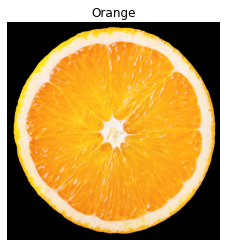

In [31]:
def show(pred,img):
  if pred>0.5: str = 'Orange'
  else: str = 'Not Orange'
  plt.imshow(img)
  plt.axis('off')
  plt.title(str)
  plt.show()
show(pred1,img_original1)

# **Segmentation**

In [32]:
%matplotlib inline
import cv2
import sys,os
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np
from __future__ import division

In [33]:
def show(image):
    # Figure size in inches
    plt.figure(figsize=(5, 5))
    # Nội suy
    plt.imshow(image, interpolation='nearest')
    
def show_mask(mask):
    plt.figure(figsize=(5, 5))
    plt.imshow(mask, cmap='gray')

In [34]:
def find_biggest_contour(image):
    image = image.copy()
    contours, _= cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    biggest_contour=0
    # Isolate largest contour // cô lập đường bao
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    if(contour_sizes):
        a=[True]
        biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
        mask = np.zeros(image.shape, np.uint8)
        cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
        return a, biggest_contour, mask
    else:
        a=[False]
        return a, biggest_contour, image

In [35]:
def overlay_mask(mask, image):
    # make the mask rgb
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    # Tính tổng trọng số của hai mảng
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    #show(img)

In [36]:
def segmentation(image):
  max_dimension = max(image.shape)
  scale = 700/max_dimension
  image = cv2.resize(image, None, fx=scale, fy=scale)
  #Convert BGR color space to RGB
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #print("Input Image:")
  show(image)

  images = []
  for i in [0, 1, 2]:
    colour = image.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 0
    if i != 2: colour[:,:,2] = 0
    images.append(colour)
  #show(np.vstack(images))
  #Để loại bỏ nhiễu 
  #Làm mờ ảnh
  image_blur = cv2.GaussianBlur(image, (7, 7), 0)
  #show(image_blur)  
  #To focus on color conert it itno HSV space. 
  image_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)
  #show(image_hsv)
 
  # Lọc màu
  #Tối thiểu, Tối đa
  min_orange = np.array([10, 100, 20])
  max_orange = np.array([25, 255, 255])
  
  #layer
  mask1 = cv2.inRange(image_hsv, min_orange, max_orange)

  #birghtness of a color is hue
  min_orange2 = np.array([180, 100, 20])
  max_orange2 = np.array([195, 255, 255])

  #layer
  mask2 = cv2.inRange(image_hsv, min_orange2, max_orange2)

  #mask capturing the orange amount
  mask = mask1 + mask2
  #print("\nSegmented Image by Color Based Detection:")
  show(mask)

  #Edge Detection using Canny
  edge=cv2.Canny(mask,50,50)
  #in ra
  show(edge)

  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
  # Fill small gaps
  mask_closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

  #làm mịn loại bỏ nhiễu
  #Dilation followed by Erosion.
  mask_clean = cv2.morphologyEx(mask_closed, cv2.MORPH_OPEN, kernel)
  a,big_orange_contour, mask_orange = find_biggest_contour(mask_clean)
  overlay = overlay_mask(mask, image) 
  image_with_ellipse = image.copy()
  if(any(a)):
    # Giới hạn hình ellipse
    ellipse = cv2.fitEllipse(big_orange_contour)
    cv2.ellipse(image_with_ellipse, ellipse, (0,0,0), 4)
    print("Orange Found :>")
    show(image_with_ellipse)
  else:
    print("Orange Not Found :<")
    show(image)

Shape: (1200, 1173, 3)
Orange Found :>


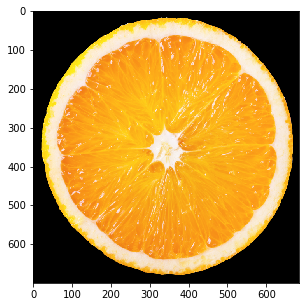

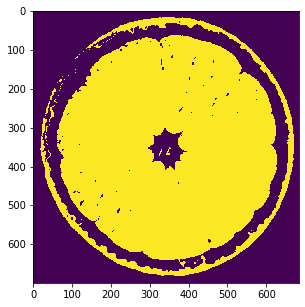

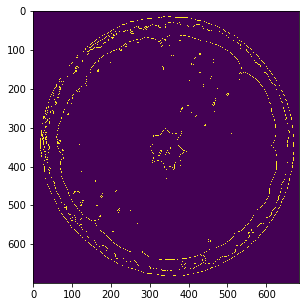

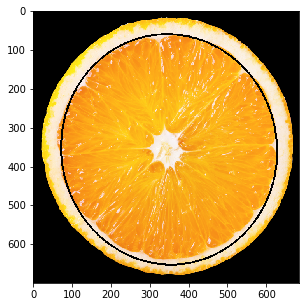

In [37]:
if pred1>0.5:
  image = cv2.imread(path1)
  print("Shape: {}".format(image.shape))
  segmentation(image)
else:
  print("Orange Not Found")
  show(image)